To avoid confusion with query result column names like count_1, we can use the .label() method to provide a name for the resulting column. This gets appendedto the function method we are using, and its argument is the name we want to use.

We can pair func.sum() with .group_by() to get a sum of the population by State and use the label() method to name the output.

We can also create the func.sum() expression before using it in the select statement. We do it the same way we would inside the select statement and store it in a variable. Then we use that variable in the select statement where the func.sum() would normally be.

In [10]:
# Import func
from sqlalchemy import create_engine, MetaData,select, func,Table


In [11]:
# Create an engine that connects to the census.sqlite file: engine
engine = create_engine('sqlite:///census.sqlite')


In [12]:
metadata=MetaData()

In [13]:
# Reflect census table from the engine: census
census = Table('census',metadata,autoload=True,autoload_with=engine)


### Build an expression to calculate the sum of the values in the pop2008 field labeled as 'population'.

In [14]:
# Build an expression to calculate the sum of pop2008 labeled as population
pop2008_sum = func.sum(census.columns.pop2008).label('population')


### Build a select statement to get the value of the state field and the sum of the values in pop2008.

In [15]:
# Build a query to select the state and sum of pop2008: stmt
stmt = select([census.columns.state,pop2008_sum])
    # not census.columns.pop2008_sum


### Group the statement by state using a .group_by() method.

In [16]:
# Group stmt by state
stmt = stmt.group_by(census.columns.state)


### Execute stmt using the connection to get the count and store the results as results.


In [17]:
connection=engine.connect()

In [18]:
# Execute the statement and store all the records: results
results = connection.execute(stmt).fetchall()


### Print the keys/column names of the results returned using results[0].keys().

In [19]:
# Print results
print(results)

[('Alabama', 4649367), ('Alaska', 664546), ('Arizona', 6480767), ('Arkansas', 2848432), ('California', 36609002), ('Colorado', 4912947), ('Connecticut', 3493783), ('Delaware', 869221), ('District of Columbia', 588910), ('Florida', 18257662), ('Georgia', 9622508), ('Hawaii', 1250676), ('Idaho', 1518914), ('Illinois', 12867077), ('Indiana', 6373299), ('Iowa', 3000490), ('Kansas', 2782245), ('Kentucky', 4254964), ('Louisiana', 4395797), ('Maine', 1312972), ('Maryland', 5604174), ('Massachusetts', 6492024), ('Michigan', 9998854), ('Minnesota', 5215815), ('Mississippi', 2922355), ('Missouri', 5891974), ('Montana', 963802), ('Nebraska', 1776757), ('Nevada', 2579387), ('New Hampshire', 1314533), ('New Jersey', 8670204), ('New Mexico', 1974993), ('New York', 19465159), ('North Carolina', 9121606), ('North Dakota', 634282), ('Ohio', 11476782), ('Oklahoma', 3620620), ('Oregon', 3786824), ('Pennsylvania', 12440129), ('Rhode Island', 1046535), ('South Carolina', 4438870), ('South Dakota', 800997),

In [20]:
# Print the keys/column names of the results returned
print(results[0].keys())
    # lable for this population

['state', 'population']


In [21]:
# import pandas
import pandas as pd


In [22]:
# Create a DataFrame from the results: df
df = pd.DataFrame(results)

In [23]:
# Set column names
df.columns = results[0].keys()


In [24]:
# Print the Dataframe
print(df)

                   state  population
0                Alabama     4649367
1                 Alaska      664546
2                Arizona     6480767
3               Arkansas     2848432
4             California    36609002
5               Colorado     4912947
6            Connecticut     3493783
7               Delaware      869221
8   District of Columbia      588910
9                Florida    18257662
10               Georgia     9622508
11                Hawaii     1250676
12                 Idaho     1518914
13              Illinois    12867077
14               Indiana     6373299
15                  Iowa     3000490
16                Kansas     2782245
17              Kentucky     4254964
18             Louisiana     4395797
19                 Maine     1312972
20              Maryland     5604174
21         Massachusetts     6492024
22              Michigan     9998854
23             Minnesota     5215815
24           Mississippi     2922355
25              Missouri     5891974
2

In [25]:
# Import pyplot as plt from matplotlib
import matplotlib.pyplot as plt


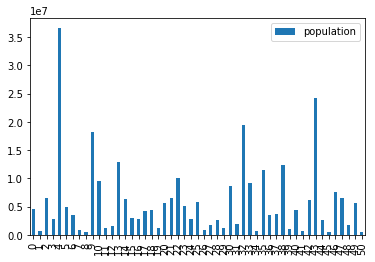

In [26]:
# Plot the DataFrame
x=df.plot.bar()
plt.show()
    # plt.show(x) would not work remember